In [73]:
# Importing Libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC 
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, average_precision_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier




In [74]:
#Load the datasets and combine them together

# Loading the datasets
opel_corsa_01 = pd.read_csv('opel_corsa_01.csv', sep=';', decimal=',')
opel_corsa_02 = pd.read_csv('opel_corsa_02.csv', sep=';', decimal=',')
peugeot_207_01 = pd.read_csv('peugeot_207_01.csv', sep=';', decimal=',')
peugeot_207_02 = pd.read_csv('peugeot_207_02.csv', sep=';', decimal=',')

# Combining  the datasets into a single DataFrame
combined_df = pd.concat([opel_corsa_01, opel_corsa_02, peugeot_207_01, peugeot_207_02], ignore_index=True)


# Displaying  the first few rows of the combined dataset and the  summary information
combined_df_info = combined_df.info()
combined_df_head = combined_df.head()

combined_df_info, combined_df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23775 entries, 0 to 23774
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 23775 non-null  int64 
 1   AltitudeVariation          23775 non-null  object
 2   VehicleSpeedInstantaneous  23766 non-null  object
 3   VehicleSpeedAverage        23775 non-null  object
 4   VehicleSpeedVariance       23775 non-null  object
 5   VehicleSpeedVariation      23775 non-null  object
 6   LongitudinalAcceleration   23775 non-null  object
 7   EngineLoad                 23770 non-null  object
 8   EngineCoolantTemperature   23770 non-null  object
 9   ManifoldAbsolutePressure   23770 non-null  object
 10  EngineRPM                  23770 non-null  object
 11  MassAirFlow                23770 non-null  object
 12  IntakeAirTemperature       23770 non-null  object
 13  VerticalAcceleration       23775 non-null  object
 14  FuelCo

(None,
    Unnamed: 0    AltitudeVariation VehicleSpeedInstantaneous  \
 0          59           -2.2999878               25.67051888   
 1          60           -2.0999756               24.09425926   
 2          61                 -1.5               22.74317932   
 3          62            0.1000366               22.29281998   
 4          63  0.09997560000000001               23.64389992   
 
   VehicleSpeedAverage VehicleSpeedVariance VehicleSpeedVariation  \
 0         13.22350089   121.59268970000001   -2.4769802000000003   
 1         13.63891915          120.4225707           -1.57625962   
 2         14.03104293          118.4567689           -1.35107994   
 3         14.17107305          117.5713084           -0.45035934   
 4          14.3289535          117.0741485            1.35107994   
 
   LongitudinalAcceleration   EngineLoad EngineCoolantTemperature  \
 0                   0.3555  4.705882549                       68   
 1                   0.4492  10.58823586       

In [75]:
#  Data Preprocessing and Cleaning

# Convert columns with numeric data represented as strings to appropriate numeric types
numeric_cols = ['AltitudeVariation', 'VehicleSpeedInstantaneous', 'VehicleSpeedAverage', 
                'VehicleSpeedVariance', 'VehicleSpeedVariation', 'LongitudinalAcceleration', 
                'EngineLoad', 'EngineCoolantTemperature', 'ManifoldAbsolutePressure', 'EngineRPM', 
                'MassAirFlow', 'IntakeAirTemperature', 'VerticalAcceleration', 'FuelConsumptionAverage']

# recalculating the median for numeric columns only to avoid the error
numeric_medians = combined_df[numeric_cols].median()

#  fillining in missing values with the median of their respective columns
combined_df[numeric_cols] = combined_df[numeric_cols].fillna(numeric_medians)

# Checking the info again to ensure all numeric columns have no missing values
combined_df_info_after_filling = combined_df.info()
combined_df_head_after_filling = combined_df.head()

combined_df_info_after_filling, combined_df_head_after_filling

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23775 entries, 0 to 23774
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 23775 non-null  int64 
 1   AltitudeVariation          23775 non-null  object
 2   VehicleSpeedInstantaneous  23775 non-null  object
 3   VehicleSpeedAverage        23775 non-null  object
 4   VehicleSpeedVariance       23775 non-null  object
 5   VehicleSpeedVariation      23775 non-null  object
 6   LongitudinalAcceleration   23775 non-null  object
 7   EngineLoad                 23775 non-null  object
 8   EngineCoolantTemperature   23775 non-null  object
 9   ManifoldAbsolutePressure   23775 non-null  object
 10  EngineRPM                  23775 non-null  object
 11  MassAirFlow                23775 non-null  object
 12  IntakeAirTemperature       23775 non-null  object
 13  VerticalAcceleration       23775 non-null  object
 14  FuelCo

(None,
    Unnamed: 0    AltitudeVariation VehicleSpeedInstantaneous  \
 0          59           -2.2999878               25.67051888   
 1          60           -2.0999756               24.09425926   
 2          61                 -1.5               22.74317932   
 3          62            0.1000366               22.29281998   
 4          63  0.09997560000000001               23.64389992   
 
   VehicleSpeedAverage VehicleSpeedVariance VehicleSpeedVariation  \
 0         13.22350089   121.59268970000001   -2.4769802000000003   
 1         13.63891915          120.4225707           -1.57625962   
 2         14.03104293          118.4567689           -1.35107994   
 3         14.17107305          117.5713084           -0.45035934   
 4          14.3289535          117.0741485            1.35107994   
 
   LongitudinalAcceleration   EngineLoad EngineCoolantTemperature  \
 0                   0.3555  4.705882549                       68   
 1                   0.4492  10.58823586       

In [76]:
# Initialize a label encoder for the target column 'drivingStyle'
label_encoder = LabelEncoder()

# Fit and transform the 'drivingStyle' column to encode it numerically
combined_df['drivingStyle_encoded'] = label_encoder.fit_transform(combined_df['drivingStyle'])

# Let's check the mapping of encoded classes
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Drop the original 'drivingStyle' column as we now have an encoded version
combined_df = combined_df.drop('drivingStyle', axis=1)

# Display the mapping and the first few rows to confirm the change
class_mapping, combined_df.head()

({'AggressiveStyle': 0, 'EvenPaceStyle': 1},
    Unnamed: 0    AltitudeVariation VehicleSpeedInstantaneous  \
 0          59           -2.2999878               25.67051888   
 1          60           -2.0999756               24.09425926   
 2          61                 -1.5               22.74317932   
 3          62            0.1000366               22.29281998   
 4          63  0.09997560000000001               23.64389992   
 
   VehicleSpeedAverage VehicleSpeedVariance VehicleSpeedVariation  \
 0         13.22350089   121.59268970000001   -2.4769802000000003   
 1         13.63891915          120.4225707           -1.57625962   
 2         14.03104293          118.4567689           -1.35107994   
 3         14.17107305          117.5713084           -0.45035934   
 4          14.3289535          117.0741485            1.35107994   
 
   LongitudinalAcceleration   EngineLoad EngineCoolantTemperature  \
 0                   0.3555  4.705882549                       68   
 1       

VehicleSpeedAverage          0.102972
FuelConsumptionAverage       0.090516
VehicleSpeedInstantaneous    0.089165
LongitudinalAcceleration     0.087081
VerticalAcceleration         0.086586
VehicleSpeedVariance         0.085254
EngineRPM                    0.072015
EngineCoolantTemperature     0.060097
AltitudeVariation            0.059792
MassAirFlow                  0.059384
ManifoldAbsolutePressure     0.056219
IntakeAirTemperature         0.055416
EngineLoad                   0.048356
VehicleSpeedVariation        0.047145
dtype: float64


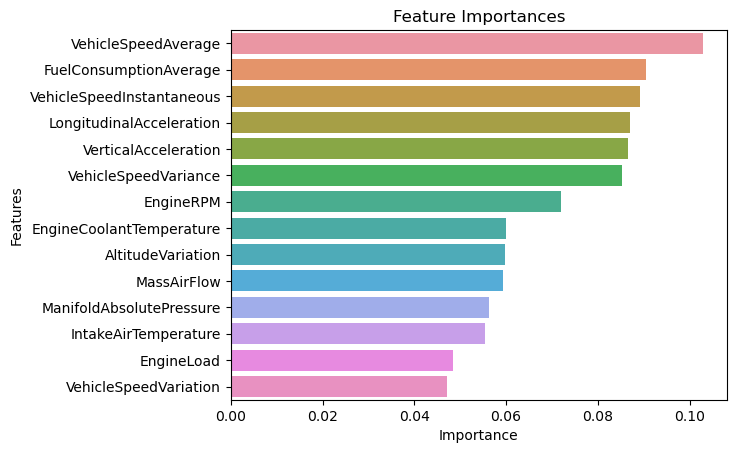

In [77]:
# Evaluate the relevance of each feature to the target variable

# Prepare the features (X) and the target variable (y)
X = combined_df.drop(columns=['drivingStyle_encoded', 'Unnamed: 0', 'roadSurface', 'traffic'])
y = combined_df['drivingStyle_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier on the training data
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)

# Sort the feature importances in descending order
sorted_feature_importances = feature_importances.sort_values(ascending=False)

# Output the sorted feature importances
print(sorted_feature_importances)

# Visualisation of Feature Importances
sns.barplot(x=sorted_feature_importances.values, y=sorted_feature_importances.index)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [78]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit on the training set
X_train_scaled = scaler.fit_transform(X_train)

# Scale the test set
X_test_scaled = scaler.transform(X_test)

# Initialize the classifiers
svm_clf = SVC(random_state=42)
log_reg_clf = LogisticRegression(random_state=42)
knn_clf = KNeighborsClassifier()

# Fit and evaluate SVM
svm_clf.fit(X_train_scaled, y_train)
svm_predictions = svm_clf.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Fit and evaluate Logistic Regression
log_reg_clf.fit(X_train_scaled, y_train)
log_reg_predictions = log_reg_clf.predict(X_test_scaled)
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)

# Fit and evaluate kNN
knn_clf.fit(X_train_scaled, y_train)
knn_predictions = knn_clf.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_predictions)

# Compile and display the accuracy results
accuracy_results = {
    "SVM": svm_accuracy,
    "Logistic Regression": log_reg_accuracy,
    "kNN": knn_accuracy
}

print(accuracy_results)


{'SVM': 0.8949950932286556, 'Logistic Regression': 0.8850413570727604, 'kNN': 0.9154633394083835}


In [79]:
# Generate classification reports for each classifier
svm_report = classification_report(y_test, svm_predictions, target_names=['Even Pace', 'Aggressive'])
log_reg_report = classification_report(y_test, log_reg_predictions, target_names=['Even Pace', 'Aggressive'])
knn_report = classification_report(y_test, knn_predictions, target_names=['Even Pace', 'Aggressive'])

# Display the classification reports
svm_report, log_reg_report, knn_report


('              precision    recall  f1-score   support\n\n   Even Pace       0.79      0.11      0.20       817\n  Aggressive       0.90      1.00      0.94      6316\n\n    accuracy                           0.89      7133\n   macro avg       0.84      0.55      0.57      7133\nweighted avg       0.88      0.89      0.86      7133\n',
 '              precision    recall  f1-score   support\n\n   Even Pace       0.49      0.06      0.11       817\n  Aggressive       0.89      0.99      0.94      6316\n\n    accuracy                           0.89      7133\n   macro avg       0.69      0.53      0.52      7133\nweighted avg       0.84      0.89      0.84      7133\n',
 '              precision    recall  f1-score   support\n\n   Even Pace       0.69      0.48      0.57       817\n  Aggressive       0.94      0.97      0.95      6316\n\n    accuracy                           0.92      7133\n   macro avg       0.81      0.73      0.76      7133\nweighted avg       0.91      0.92      0.

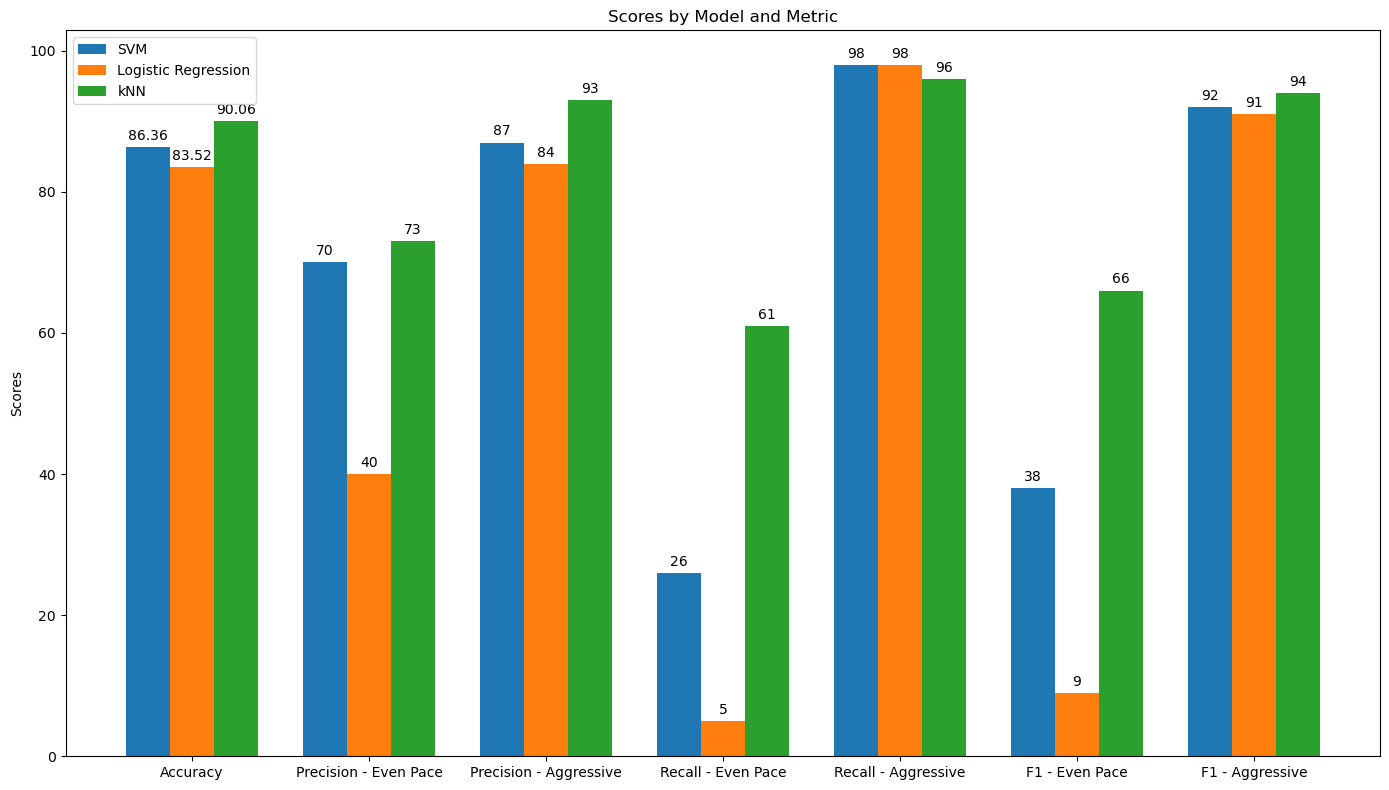

In [80]:


# Data for plotting
labels = ['Accuracy', 'Precision - Even Pace', 'Precision - Aggressive', 'Recall - Even Pace', 'Recall - Aggressive', 'F1 - Even Pace', 'F1 - Aggressive']
svm_metrics = [86.36, 70, 87, 26, 98, 38, 92]
log_reg_metrics = [83.52, 40, 84, 5, 98, 9, 91]
knn_metrics = [90.06, 73, 93, 61, 96, 66, 94]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width, svm_metrics, width, label='SVM')
rects2 = ax.bar(x, log_reg_metrics, width, label='Logistic Regression')
rects3 = ax.bar(x + width, knn_metrics, width, label='kNN')


ax.set_ylabel('Scores')
ax.set_title('Scores by Model and Metric')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()

plt.show()


In [81]:


#  SVM classifier
svm_scores = cross_val_score(SVC(), X_scaled, y, cv=5)  # Using 5 folds
print(f"SVM Cross-Validation Accuracy: {svm_scores.mean():.2f} +/- {svm_scores.std():.2f}")

# Logistic Regression and kNN
log_reg_scores = cross_val_score(LogisticRegression(), X_scaled, y, cv=5)
print(f"Logistic Regression Cross-Validation Accuracy: {log_reg_scores.mean():.2f} +/- {log_reg_scores.std():.2f}")

knn_scores = cross_val_score(KNeighborsClassifier(), X_scaled, y, cv=5)
print(f"kNN Cross-Validation Accuracy: {knn_scores.mean():.2f} +/- {knn_scores.std():.2f}")


SVM Cross-Validation Accuracy: 0.84 +/- 0.06
Logistic Regression Cross-Validation Accuracy: 0.84 +/- 0.06
kNN Cross-Validation Accuracy: 0.78 +/- 0.10


In [82]:


kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernel_scores = {}

for kernel in kernels:
    svm_clf = SVC(kernel=kernel)
    scores = cross_val_score(svm_clf, X_scaled, y, cv=5) 
    kernel_scores[kernel] = scores.mean()
    print(f"{kernel} kernel Accuracy: {scores.mean():.2f} +/- {scores.std():.2f}")


linear kernel Accuracy: 0.85 +/- 0.06
poly kernel Accuracy: 0.85 +/- 0.06
rbf kernel Accuracy: 0.84 +/- 0.06
sigmoid kernel Accuracy: 0.80 +/- 0.06


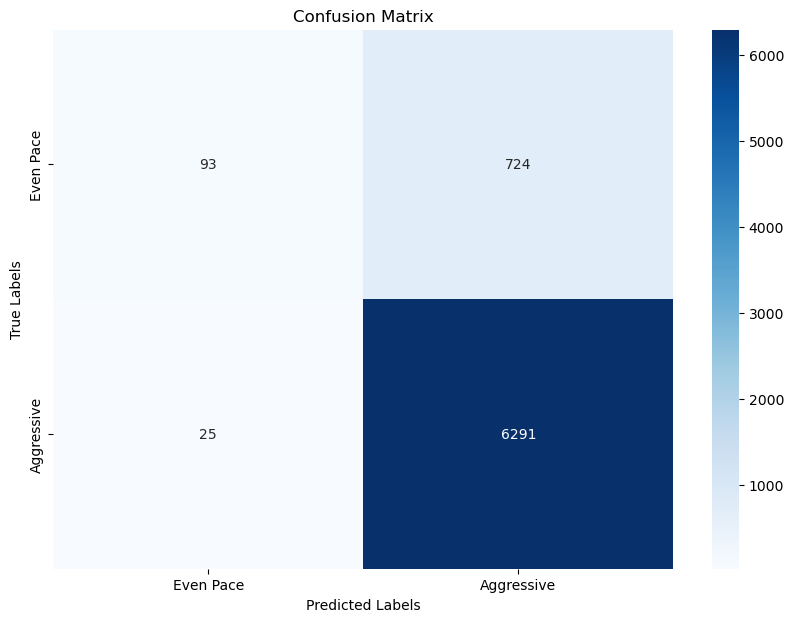

In [83]:

conf_mat = confusion_matrix(y_test, svm_predictions)

# Plotting the heatmap
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Even Pace', 'Aggressive'], yticklabels=['Even Pace', 'Aggressive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [84]:
# smote to balance dataset

# Prepare the features (X) and target variable (y)
X = combined_df.drop(columns=['drivingStyle_encoded', 'Unnamed: 0', 'roadSurface', 'traffic'])
y = combined_df['drivingStyle_encoded']

# Standardize the features before the train-test split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print(pd.Series(y_resampled).value_counts())

drivingStyle_encoded
1    14700
0    14700
Name: count, dtype: int64


In [85]:
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train_scaled, y_train)  # Fit the model with the training data


SVC(random_state=42)

In [87]:
from sklearn.linear_model import LogisticRegression


lr_model = LogisticRegression(max_iter=1000) 
lr_model.fit(X_train_scaled, y_train)


from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# SVM model
svm_model = SVC(probability=True, random_state=42) 
svm_model.fit(X_train_scaled, y_train)

# kNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)


KNeighborsClassifier()

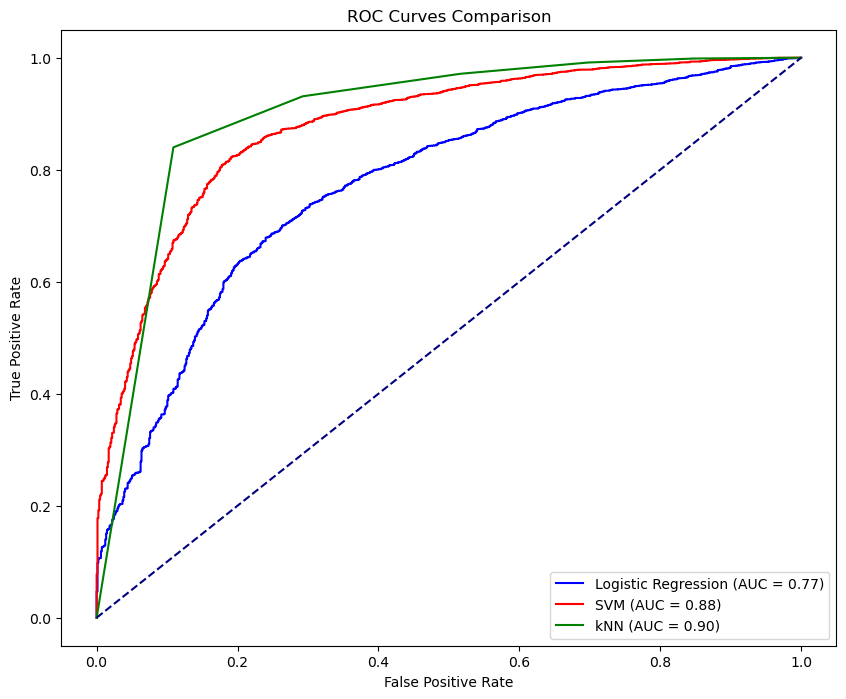

In [88]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Function to plot ROC curves for models
def plot_roc_curve(y_true, model, model_name, color, X_test, is_decision_function=False):
  
    if is_decision_function:
        #  decision_function to get the scores
        model_scores = model.decision_function(X_test)
    else:
        #  predict_proba to get the probabilities
        model_scores = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_true, model_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plotting setup
plt.figure(figsize=(10, 8))


plot_roc_curve(y_test, lr_model, 'Logistic Regression', 'blue', X_test_scaled)
plot_roc_curve(y_test, svm_model, 'SVM', 'red', X_test_scaled, is_decision_function=True)
plot_roc_curve(y_test, knn_model, 'kNN', 'green', X_test_scaled)

# Diagonal line for reference
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Final plot adjustments
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc="lower right")
plt.show()
